In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [66]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [67]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027313
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416672
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389572
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813278
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337982


In [68]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [69]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


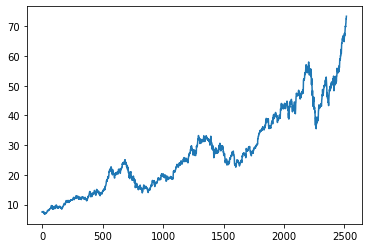

In [70]:
plt.plot(df.Close)

In [71]:
movingAverage50 = df.Close.rolling(50).mean()
movingAverage50

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    65.16060
2513    65.43355
2514    65.71070
2515    65.99190
2516    66.27810
Name: Close, Length: 2517, dtype: float64

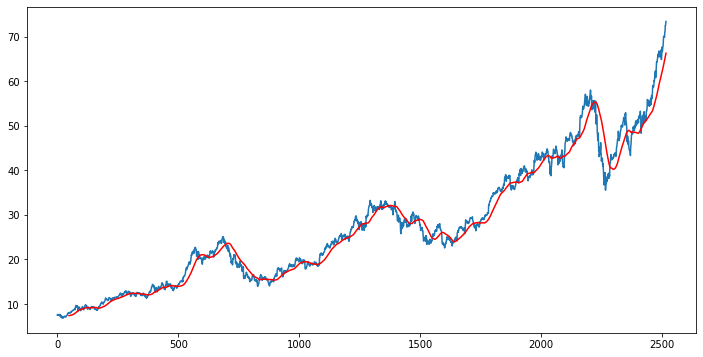

In [72]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(movingAverage50,'r')

In [73]:
movingAverage200 = df.Close.rolling(200).mean()
movingAverage200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

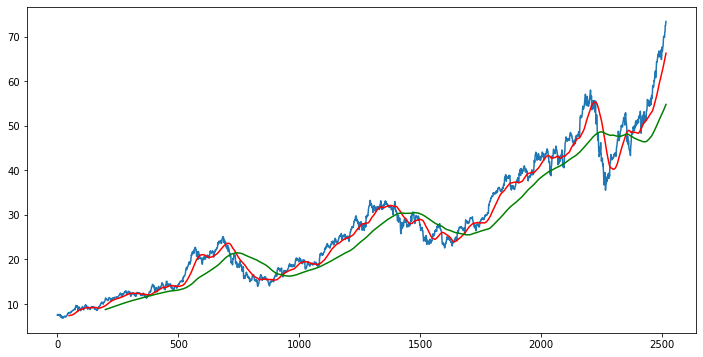

In [74]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(movingAverage50,'r')
plt.plot(movingAverage200,'g')

In [75]:
df.shape

(2517, 5)

In [76]:
# test-train split

training_data = pd.DataFrame(df['Close'][:int(len(df)*0.70)])
testing_data = pd.DataFrame(df['Close'][int(len(df)*0.70):])

print(training_data.shape)
print(testing_data.shape)

(1761, 1)
(756, 1)


In [77]:
training_data.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [78]:
testing_data.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [79]:
scaler = MinMaxScaler(feature_range=(0,1))
training_data_array = scaler.fit_transform(training_data)
training_data_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [80]:
X_training = []
y_training = []

for i in range(100, training_data_array.shape[0]):
    X_training.append(training_data_array[i-100:i])
    y_training.append(training_data_array[i, 0])
    
X_training, y_training = np.array(X_training), np.array(y_training)

In [81]:
X_training.shape

(1661, 100, 1)

In [82]:
# ML model
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_training.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [84]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [85]:
model.fit(X_training, y_training, epochs=50)

Epoch 1/50
52/52 [==============================] - 10s 104ms/step - loss: 0.1324
Epoch 2/50
52/52 [==============================] - 5s 99ms/step - loss: 0.0128
Epoch 3/50
52/52 [==============================] - 5s 104ms/step - loss: 0.0095
Epoch 4/50
52/52 [==============================] - 5s 101ms/step - loss: 0.0098
Epoch 5/50
52/52 [==============================] - 5s 100ms/step - loss: 0.0103
Epoch 6/50
52/52 [==============================] - 5s 100ms/step - loss: 0.0087
Epoch 7/50
52/52 [==============================] - 5s 99ms/step - loss: 0.0079
Epoch 8/50
52/52 [==============================] - 5s 105ms/step - loss: 0.0079
Epoch 9/50
52/52 [==============================] - 6s 115ms/step - loss: 0.0070
Epoch 10/50
52/52 [==============================] - 6s 106ms/step - loss: 0.0078
Epoch 11/50
52/52 [==============================] - 5s 103ms/step - loss: 0.0074
Epoch 12/50
52/52 [==============================] - 8s 146ms/step - loss: 0.0068
Epoch 13/50
52/52 [=======

In [86]:
model.save('keras_model.h5')

In [87]:
training_data.tail()

,Close
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001
1760,29.190001


In [88]:
testing_data.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [89]:
past_100_days = training_data.tail(100)

In [90]:
final_df = past_100_days.append(testing_data, ignore_index=True)

In [91]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [92]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [93]:
input_data.shape

(856, 1)

In [94]:
X_testing = []
y_testing = []

for i in range(100, input_data.shape[0]):
    X_testing.append(input_data[i-100:i])
    y_testing.append(input_data[i, 0])
    
X_testing, y_testing = np.array(X_testing), np.array(y_testing)

In [95]:
print(X_testing.shape)
print(y_testing.shape)

(756, 100, 1)
(756,)


In [96]:
# Making Predictions
y_predicted = model.predict(X_testing)

In [97]:
y_predicted.shape

(756, 1)

In [98]:
y_testing

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [99]:
y_predicted

array([[0.12842278],
       [0.12948106],
       [0.1304402 ],
       [0.1312787 ],
       [0.1319844 ],
       [0.1325558 ],
       [0.13301226],
       [0.13339266],
       [0.13373989],
       [0.13409336],
       [0.13447997],
       [0.13490859],
       [0.13538384],
       [0.13590792],
       [0.13647412],
       [0.13707113],
       [0.13768646],
       [0.13830552],
       [0.13892947],
       [0.13957007],
       [0.14023504],
       [0.14092335],
       [0.1416239 ],
       [0.14238937],
       [0.14330325],
       [0.14442776],
       [0.14580911],
       [0.14748015],
       [0.14945415],
       [0.15172231],
       [0.15424988],
       [0.15697712],
       [0.15980464],
       [0.16273345],
       [0.16575038],
       [0.16883385],
       [0.17196384],
       [0.17512175],
       [0.17828006],
       [0.1813918 ],
       [0.18439263],
       [0.18726218],
       [0.19001506],
       [0.19266579],
       [0.19522616],
       [0.19770083],
       [0.2000885 ],
       [0.202

In [100]:
scaler.scale_

array([0.02099517])

In [101]:
scale_factor = 1/0.02640961
y_predicted = y_predicted * scale_factor
y_testing = y_testing * scale_factor

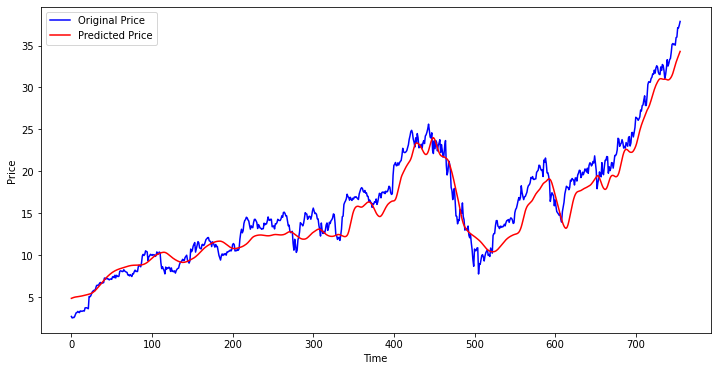

In [102]:
plt.figure(figsize=(12,6))
plt.plot(y_testing, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()